In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [63]:
original_df = pd.read_csv('winemag-data-130k-v2.csv')
df = original_df

In [64]:
original_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


#Etapa de Exploração dos dados

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


## *Countries*

*Countries*, ou países em português, é um tipo de dado representado pelo formato *String*, o qual indica o país de origem do vinho, pode-se observar a partir dele que a maior quantidade de vinhos avaliados vieram dos Estados Unidos, seguidos da França, Itália, Espanha, Portugal e Chile. Ademais, há poucos dados de países ausentes, sendo esses apenas 0.0484724% da amostra total, nesse contexto o fator de ruído existente é o de a possível maior facilidade de classificar vinhos vindos desses país em comparação aos que possuem menor quantidade de avaliações. Nesse contexto, tal dado tem bastante relevância para atividade de previsão de classificação dos vinhos, pois esse pode impactar indiretamente na qualidade do mesmo.

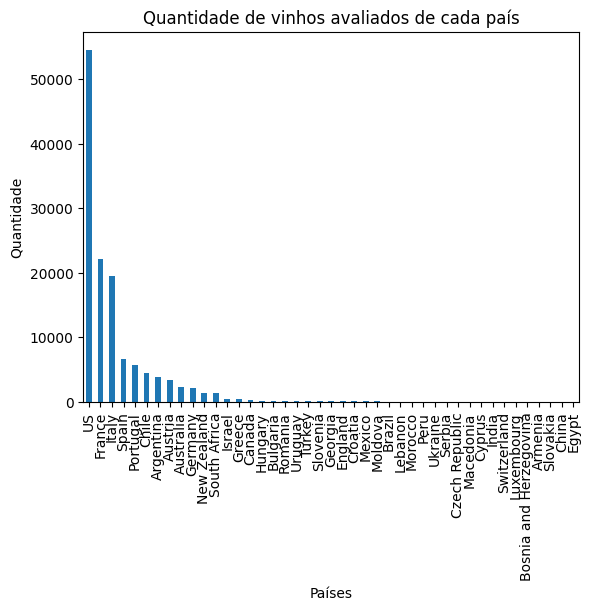

In [66]:
countries = df['country'].value_counts()
countries.plot(kind='bar')

plt.xlabel('Países')
plt.ylabel('Quantidade')
plt.title('Quantidade de vinhos avaliados de cada país')
plt.show()

## *Description*

*Description*, ou descrição em português, é um tipo de dado representado pelo formato *String*. Não há dados de descrições ausentes, nesse contexto o fator de ruído existente é a subjetividade das palavras usadas por cada avaliador. Além disso, tal dado tem bastante relevância para a atividade de previsão de classificação de vinhos, pois esse pode revelar informações importantes para essa atividade.

## *Designation*

*Designation*, ou designação em português, é um tipo de dado representado pelo formato *String*, o qual refere-se à designação ou nome dado a uma parte específica de uma vinícola onde as uvas utilizadas para fazer o vinho são cultivadas. Há uma quantidade significativa de designações ausentes, sendo essas 28.8251135% da amostra total, nesse contexto o fator ruído é existente, podendo dificultar a classificação dos vinhos. Apesar disso, tal dado tem bastante relevância para a atividade de previsão de classificação de vinhos, pois esse pode impactar bastante na qualidade do mesmo.

In [67]:
df['designation'].value_counts()

designation
Reserve                          2009
Estate                           1322
Reserva                          1259
Riserva                           698
Estate Grown                      621
                                 ... 
Ilercavònia                         1
VA                                  1
Sein                                1
Vigna Riserva                       1
Lieu-dit Harth Cuvée Caroline       1
Name: count, Length: 37979, dtype: int64

## *Points*

*Points*, ou pontos em português, é um tipo de dado representado pelo formato *int64*, ou seja um número inteiro representado por 64 bits, o qual indica a nota obtida pelo vinho em uma escala de 1 a 100, entretanto só foram publicadas notas iguais ou maiores a 80. Não há dados de pontos ausentes, nesse contexto o fator de ruído é relativo a subjetividade da avaliação e a possível dificuldade de classificar vinhos de menor qualidade devido sua ausência no conjunto de dados. Entretanto, tal dado é extremamente importante para a atividade de previsão de classificação de vinhos.

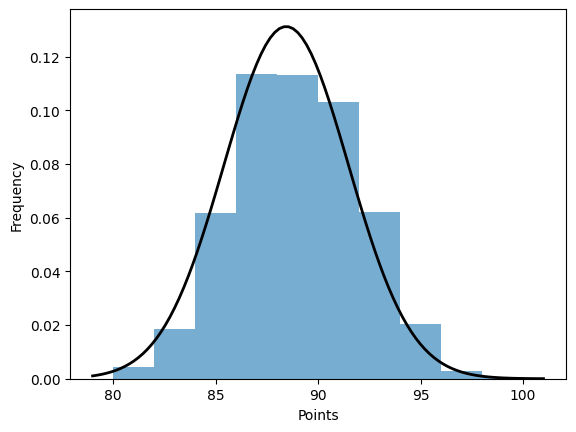

In [68]:
from scipy.stats import norm

points = df['points']
_, bins = np.histogram(points)
mu, std = points.mean(), points.std()
plt.hist(points, bins, alpha=0.6, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.xlabel('Points')
plt.ylabel('Frequency')
plt.plot(x, p, 'k', linewidth=2)
plt.show()

## *Price*

*Price*, ou preço em português, é um tipo de dado representado pelo formato *float64*, ou seja um número real representado por 64 bits, o qual indica o preço correspondente a uma garrafa desse vinho. Há dados de preços ausentes, sendo esses correspondentes a 6.921544% da amostra total, podendo gerar um ruído no modelo. Nesse contexto, tal dado tem relevância para atividade de previsão de classificação dos vinhos, pois se espera que uma garrafa mais cara corresponda a um vinho de maior qualidade, porém tal realação não é certa.

(array([25102., 37880., 20169., 14716.,  9870.,  3954.,  3043.,  1697.,
         1388.,   480.]),
 array([  400.,  1530.,  2660.,  3790.,  4920.,  6050.,  7180.,  8310.,
         9440., 10570., 11700.]),
 <BarContainer object of 10 artists>)

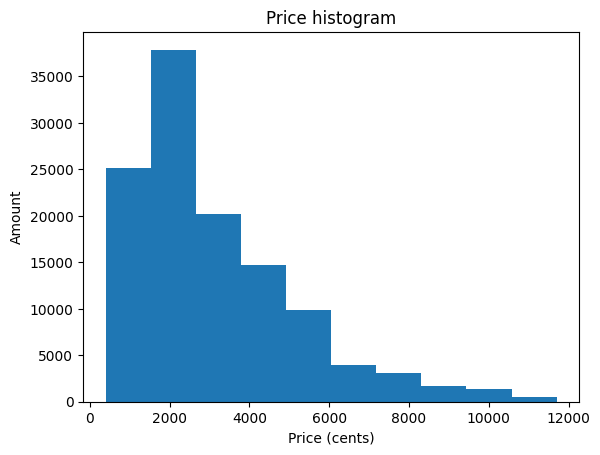

In [69]:
price = df['price'].dropna() * 100

# remove outliers
price = price[abs(price - np.mean(price)) < 2 * np.std(price)]
_, bins = np.histogram(price)

plt.xlabel('Price (cents)')
plt.ylabel('Amount')
plt.title('Price histogram')
plt.hist(price, bins)

Text(0.5, 1.0, 'Price (cents) and points')

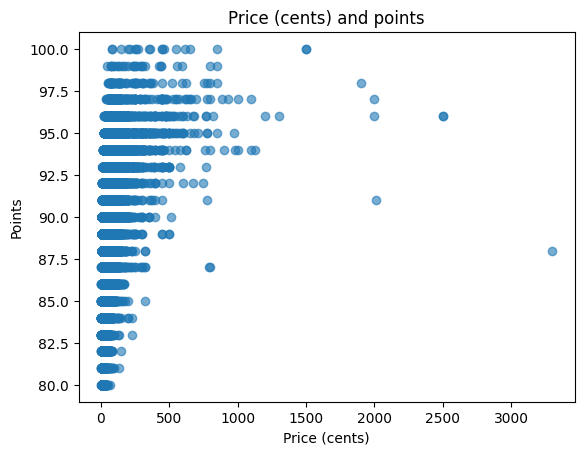

In [70]:
plt.scatter(df['price'], df['points'], alpha=0.6)
plt.xlabel('Price (cents)')
plt.ylabel('Points')
plt.title('Price (cents) and points')

## *Province*

*Province*, ou provincia em português, é um tipo de dado representado pelo formato *String*, o qual indica a provincia ou estado de origem do vinho. Há poucos dados de provincia ausentes, sendo esses apenas 0.0484724% da amostra total, nesse contexto o fator de ruído existente é o de a possível maior facilidade de classificar vinhos vindos das provincias que mais aparecem em comparação aos que possuem menor quantidade de avaliações. Apesar disso, tal dado tem bastante relevância para atividade de previsão de classificação dos vinhos, pois esse pode impactar indiretamente na qualidade do mesmo.

## *Region_1*

*Region 1*, ou região 1 em português, é um tipo de dado representado pelo formato *String*, o qual se refere à área de cultivo de vinho em uma província ou estado específico de origem do vinho. Há dados da região 1 ausentes, sendo esses 1.63468493% da amostra total, nesse contexto o fator de ruído existente é o da possível maior facilidade de classificar vinhos vindos das regiões mais avaliadas em comparação com as que possuem menor quantidade de avaliações. Nesse contexto, tal dado tem bastante relevância para atividade de previsão de classificação dos vinhos, pois esse pode impactar indiretamente na qualidade do mesmo.

## *Region_2*

_Region 2_, ou região 2 em português, é um dado do tipo _String_, que representa a região específica em que o vinho é cultivado (ex: Rutherford dentro de Napa Valley). Esse valor é nulo em 61% dos casos, já que essa informação frequentemente não existe.

Pela quantidade alta de valores nulos, esse atributo não será muito útil para as análises do trabalho.

## *Taster_name* e *taster_twitter_handle*

Esses atributos, ambos do tipo _String_, representam o nome e usuário do _Twitter_ do autor daquela _review_. Esses dados são nulos em 20% e em 24% dos casos, respectivamente. Diante disso, esses dados, podem acabar não sendo tão uteis, pois não estão presentes em boa parte dos casos, pois sua utilização podeia causar ruído no modelo gerado.

## *Title*

*Title*, ou título em português, é um dado do tipo _String_, que contem o título da avaliação e o ano da safra. Esse valor está presente em 100% dos casos e pode ser bastante relevante para avaliação, pois o ano da safra pode um fator ser impactante na qualidade do vinho.

## *Variety*

*Variety*, ou variedade em português, é um dado do tipo _String_, que contem o tipo de uvas utilizadas para fazer o vinho. Esse dado está presente em quase 100% dos casos e pode ser bastante relevante para avaliação dado que isso pode influenciar diretamente na qualidade do vinho.

## *Winery*

*Winery*, ou vinícola em português, é um dado do tipo _String_, que contem a vinícola de origem do vinho. Esse dado está presente em 100% dos casos e pode ser bastante relevante para avaliação, dado que a vinícola de origem pode influenciar na qualidade do vinho.

# Etapa de preparação de dados


## *Country*

Eliminaremos as tuplas nos quais o valor de *country* é nulo e em seguida codificaremos com um número que representará cada país

In [71]:
df = df.dropna(subset=['country'])

# Mapeia cada país com um número
uniqui_countries = df['country'].unique()
map_of_countries = {country: i for i, country in enumerate(uniqui_countries)}

# Aplicar o mapeamento à coluna 'country'
df['country'] = df['country'].map(map_of_countries)

<ipython-input-71-53e0e8f869f8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].map(map_of_countries)


## *Description*

O atributo *description* não necessita de tratamento neste primeiro momento

## *Designation*

Devido a alta incidência de valores ausentes, aproximadamente 30% da tuplas, eliminaremos esse atribuito do *dataset*

In [72]:
df = df.drop('designation', axis=1)

## *Points*

Normalizaremos os valores na coluna de *points*

In [73]:
# Encontramos o valor mínimo e máximo da coluna
min_value = df['points'].min()
max_value = df['points'].max()

# Aplicamos a fórmula de normalização min-max
df['points'] = (df['points'] - min_value) / (max_value - min_value)

## *Price*

Eliminaremos as tuplas nos quais o atributo *price* é nulo, em seguida removemos os *outliers* de *price* e por fim normalizaremos os valores na coluna *price*

In [74]:
df = df.dropna(subset=['price'])

# Remoção de outliers
z_scores = stats.zscore(df['price'])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

# Encontramos o valor mínimo e máximo da coluna
min_value = df['price'].min()
max_value = df['price'].max()

# Aplicamos a fórmula de normalização min-max
df['price'] = (df['price'] - min_value) / (max_value - min_value)

## *Province*

Eliminaremos as tuplas nos quais o valor de *province* é nulo e em seguida codificaremos com um número que representará cada provincia

In [75]:
df = df.dropna(subset=['province'])

# Mapeia cada provincia com um número
uniqui_provinces = df['province'].unique()
map_of_provinces = {province: i for i, province in enumerate(uniqui_provinces)}

# Aplicar o mapeamento à coluna 'province'
df['province'] = df['province'].map(map_of_provinces)

## *Region_1*

Eliminaremos as tuplas nos quais o valor de *region_1* é nulo e em seguida codificaremos com um número que representará cada região_1

In [76]:
df = df.dropna(subset=['region_1'])

# Mapeia cada região_1 com um número
uniqui_regions_1 = df['region_1'].unique()
map_of_regions_1 = {region_1: i for i, region_1 in enumerate(uniqui_regions_1)}

# Aplicar o mapeamento à coluna 'region_1'
df['region_1'] = df['region_1'].map(map_of_regions_1)

<ipython-input-76-66049d99d9b3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region_1'] = df['region_1'].map(map_of_regions_1)


## *Region_2*

Devido a alta incidência de valores ausentes, aproximadamente 61% da tuplas, eliminaremos esse atribuito do *dataset*

In [77]:
df = df.drop('region_2', axis=1)

## *Taster_name e taster_twitter_handle*

Devido a alta incidência de valores ausentes, 20% das tuplas e em 24% das tuplas, respectivamente, eliminaremos esse atribuito do *dataset*

In [78]:
df = df.drop('taster_name', axis=1)
df = df.drop('taster_twitter_handle', axis=1)

## *Title*

O atributo *Title* não necessita de tratamento neste primeiro momento

## *Variety*

Eliminaremos as tuplas nos quais o valor de *variety* é nulo e em seguida codificaremos com um número que representará cada tipo de uva usado para produção do vinho

In [79]:
df = df.dropna(subset=['variety'])

# Mapeia cada variedade com um número
uniqui_varieties = df['variety'].unique()
map_of_varieties = {variety: i for i, variety in enumerate(uniqui_varieties)}

# Aplicar o mapeamento à coluna 'variety'
df['variety'] = df['variety'].map(map_of_varieties)

## *Winery*

Codificaremos com um número que representará cada tipo de vinícola

In [80]:
# Mapeia cada vinícola com um número
uniqui_wineries = df['winery'].unique()
map_of_wineries = {winery: i for i, winery in enumerate(uniqui_wineries)}

# Aplicar o mapeamento à coluna 'winery'
df['winery'] = df['winery'].map(map_of_wineries)

In [81]:
df

,Unnamed: 0,country,description,points,price,province,region_1,title,variety,winery
2,2,2,"Tart and snappy, the flavors of lime flesh and...",0.35,0.064935,1,0,Rainstorm 2013 Pinot Gris (Willamette Valley),0,0
3,3,2,"Pineapple rind, lemon pith and orange blossom ...",0.35,0.058442,2,1,St. Julian 2013 Reserve Late Harvest Riesling ...,1,1
4,4,2,"Much like the regular bottling from 2012, this...",0.35,0.396104,1,0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,2,2
5,5,3,Blackberry and raspberry aromas show a typical...,0.35,0.071429,3,2,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,3,3
6,6,0,"Here's a bright, informal red that opens with ...",0.35,0.077922,4,3,Terre di Giurfo 2013 Belsito Frappato (Vittoria),4,4
...,...,...,...,...,...,...,...,...,...,...
129965,129965,4,"While it's rich, this beautiful dry wine also ...",0.50,0.155844,5,4,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,0,6809
129967,129967,2,Citation is given as much as a decade of bottl...,0.50,0.461039,1,12,Citation 2004 Pinot Noir (Oregon),2,6027
129968,129968,4,Well-drained gravel soil gives this wine its c...,0.50,0.168831,5,4,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,5,8789
129969,129969,4,"A dry style of Pinot Gris, this is crisp with ...",0.50,0.181818,5,4,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),0,4214


Por fim, salvando o dataset unificado:

In [83]:
df.to_csv('/content/prepared_wine_reviews.csv', index=False)